<h1>Sales Analysis</h1>

In [1]:
import pandas as pd
from IPython.display import display
import os
import matplotlib.pyplot as plt

<h2>Merging 12 months of sales data into a single file </h2>

In [2]:
#files = []
#for file in os.listdir('./Sales_Data'):
#    files.append(pd.read_csv(f'./Sales_Data/{file}'))

files = [pd.read_csv(f'./Sales_Data/{file}') for file in os.listdir('./Sales_Data')]

allMonthsDF = pd.concat(files)
allMonthsDF.to_csv('allMonthsDF.csv')

<h3>Read the updated csv</h3>

In [2]:
all_data = pd.read_csv('allMonthsDF.csv')

<h4>Cleaning Data</h4>

In [3]:
#Droping rows with NaN values
all_data = all_data.dropna()
#Find 'Or' and deleting to avoid errors with month collum
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
#Convert Collumns to the correct type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

<h2> Question 1: What was the best month for sales? How much was earned that month?</h2>

<h3> Creating month collum </h3>

In [4]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

<h3>Creating a sales collum

In [5]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
##Changing collumns order
all_data = all_data[['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Month' ,'Purchase Address']]

<h3>GroupBy</h3>


In [6]:
sales_results = all_data.groupby(by='Month', sort=True).sum()['Sales']

<h3>Creating Graphic</h3>

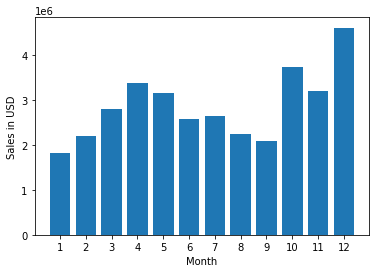

In [7]:
months = range(1, 13)
plt.bar(months, sales_results)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

<h2>Question 2: What city had the highest number of sales</h2>

<h3> Creating city collum</h3>


In [9]:
adresses = all_data['Purchase Address'].str.split(',')
all_data['City'] = [f'{address[1]}  ({address[2][0:3].strip()})' for address in adresses]
display(all_data)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...
186845,11681,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,9,"840 Highland St, Los Angeles, CA 90001",Los Angeles (CA)
186846,11682,259354,iPhone,1,700.00,700.00,09/01/19 16:00,9,"216 Dogwood St, San Francisco, CA 94016",San Francisco (CA)
186847,11683,259355,iPhone,1,700.00,700.00,09/23/19 07:39,9,"220 12th St, San Francisco, CA 94016",San Francisco (CA)
186848,11684,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,9,"511 Forest St, San Francisco, CA 94016",San Francisco (CA)


<h3>Group by</h3>



In [10]:
cities_results = all_data.groupby(by='City', sort=True).sum()['Sales']

<h3> Creating Graphic </h3>


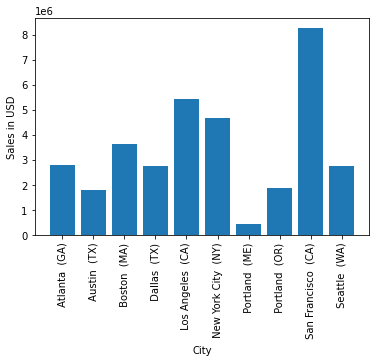

In [11]:
cities = [city for city,df in all_data.groupby('City')]
plt.bar(cities ,cities_results)
plt.xticks(cities, rotation='vertical')
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.show()

<h2>Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?</h2>

In [13]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

0        2019-04-19 08:46:00
2        2019-04-07 22:30:00
3        2019-04-12 14:38:00
4        2019-04-12 14:38:00
5        2019-04-30 09:27:00
                 ...        
186845   2019-09-17 20:56:00
186846   2019-09-01 16:00:00
186847   2019-09-23 07:39:00
186848   2019-09-19 17:30:00
186849   2019-09-30 00:18:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

In [15]:
#Creating hour collum
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

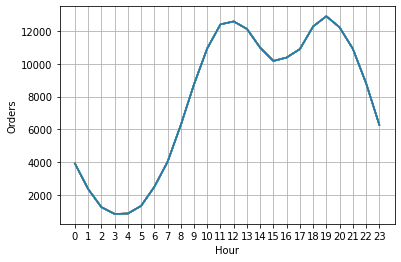

In [18]:
hours = [hour for hour,df in all_data.groupby('Hour')]
hour_results = all_data.groupby(['Hour']).count()
plt.plot(hours, hour_results)
plt.xlabel('Hour')
plt.ylabel('Orders')
plt.xticks(hours)
plt.grid()
plt.show()

#Anwser: At 11am or 7pm

<h2>Question 4: What products are most often sold together?</h2>

